| [**Lattice QCD I**](https://homepages.uni-regensburg.de/~lec17310/teaching/wise2122/lqft.html) | - | [**Christoph Lehner**](https://go.ur.de/lehner) |
|:-|--|-:|

# Chapter 8: strong coupling expansion



In this chapter we perform a strong-coupling expansion of the path integral and the expectation value
of a Wilson loop
$$
\begin{align}
W_C = \textrm{Tr}\left[\prod_{\mu_i,x_i,m_i \in C} U^{m_i}_{\mu_i}(x_i)\right] \,,
\end{align}
$$
where $m_i \in \{ \dagger, 1 \}$.
The path $C$ could, e.g., describe a plaquette, a rectangle, or more complicated closed paths.

We will perform the expansion using the Wilson gauge action
$$
\begin{align}
S_W &= \beta \sum_x \sum_{\mu<\nu} ( 1 - P_{\mu\nu}(x)) 
\end{align}
$$
with scalar plaquette
$$
\begin{align}
P_{\mu\nu}(x) &= \frac1{N_c} \textrm{Re}\: \textrm{Tr}\: U_{\mu\nu}(x) \,, \\
U_{\mu\nu}(x) &= U_\mu(x) U_\nu(x+a \hat{\mu}) U_\mu^\dagger(x + a \hat{\nu}) U_\nu^\dagger(x) \,,
\end{align}
$$
and
$$
\begin{align}
\beta &= \frac{2 N_c}{g^2} \,.
\end{align}
$$
The expansion in a large coupling parameter $g$, therefore corresponds to an expansion in a small
number $\beta$.

The expectation value of a Wilson loop is then given by
$$
\begin{align}
\langle W_C \rangle &= \frac{
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\exp\left[ -\beta \sum_x \sum_{\mu<\nu} ( 1 - P_{\mu\nu}(x)) \right]
}{
\int d[U]
\exp\left[ -\beta \sum_x \sum_{\mu<\nu} ( 1 - P_{\mu\nu}(x)) \right]
} \\
&= \frac{
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\exp\left[ \beta \sum_x \sum_{\mu<\nu} P_{\mu\nu}(x) \right]
}{
\int d[U]
\exp\left[ \beta \sum_x \sum_{\mu<\nu} P_{\mu\nu}(x) \right]
} \\
&= 
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\exp\left[ \beta \sum_x \sum_{\mu<\nu} P_{\mu\nu}(x) \right] ( 1 + O(\beta)) \\
&= 
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\exp\left[ \frac{\beta}{N_c} \sum_x \sum_{\mu<\nu} \textrm{Re}\: \textrm{Tr}\: U_{\mu\nu}(x) \right] ( 1 + O(\beta)) \\
&= 
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\exp\left[ \frac{\beta}{2N_c} \sum_x \sum_{\mu<\nu} (\textrm{Tr}\: U_{\mu\nu}(x) + \textrm{Tr}\: U^\dagger_{\mu\nu}(x)) \right] ( 1 + O(\beta)) \\
&= 
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\exp\left[ \frac{\beta}{2N_c} \sum_x \sum_{\mu \neq \nu} \textrm{Tr}\: U_{\mu\nu}(x) \right] ( 1 + O(\beta)) \\
&= 
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\sum_{n=0}^\infty \frac1{n!} \left(\frac{\beta}{2N_c}\right)^n (\sum_P \textrm{Tr}\: U_P)^n ( 1 + O(\beta)) \,,
\end{align}
$$
where in the last line we sum over all possible plaquettes $P$ (every spacetime-point and every $x$).

Let us now first consider the leading order $n=0$ term for which we need to perform the integral
$$
\begin{align}
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] \,.
\end{align}
$$
Note that for any closed Wilson loop, each link $U_\mu(x)$ or its adjoint only appears once.  In the case of the plaquette, e.g.,
$$
\begin{align}
U_{\mu\nu}(x) &= U_\mu(x) U_\nu(x+a \hat{\mu}) U_\mu^\dagger(x + a \hat{\nu}) U_\nu^\dagger(x)
\end{align}
$$
such that if we integrate over $U_\mu(x)$ first, we are performing an integral of the type
$$
\begin{align}
M_{ab} = \int d[U_\mu(x)] (U_\mu(x))_{ab} \,.
\end{align}
$$
One can show that for any $V \in $ SU(3), we have
$$
\begin{align}
(VM)_{ab} = \int d[U_\mu(x)] (V U_\mu(x))_{ab} = \int d[U_\mu(x)] (U_\mu(x))_{ab} = M_{ab}
\end{align}
$$
due to the invariance of the Haar measure.  In matrix form, we have
$$
\begin{align}
VM = M
\end{align}
$$
for any group element $V$.  One can show that this can only be satisfied for
$$
\begin{align}
M = 0 \,.
\end{align}
$$
The leading term $n=0$ therefore vanishes.

Before moving on to the $n=1$ term, we first verify the integral equation numerically by a straightforward extension of our Haar integration routine to SU(3).

In [90]:
import gpt as g
import numpy as np
import scipy.linalg

su3_generators = g.object_type.ot_matrix_su_n_fundamental_algebra(3).generators(np.complex128)

U = [np.matrix(scipy.linalg.expm(2j*sum([np.random.normal()*p.array for p in su3_generators]))) for i in range(40)]
for u in U:
    assert np.linalg.norm(u * u.H - np.identity(3)) < 1e-14

np.random.seed(13)

def haar_integrate(f, U, N, NskipToMakeIndependent):
    u0 = U[np.random.randint(0,len(U))]
    val = 0.0
    val2 = 0.0
    n = 0.0
    for i in range(N):
        v = f(u0).real
        val += v
        val2 += v**2
        n += 1
        for j in range(NskipToMakeIndependent):
            u0 = U[np.random.randint(0,len(U))] * u0
    # just use biased estimator for error
    return (val/n, (val2/n - (val/n)**2)**0.5 / n**0.5 )

for a in range(3):
    for b in range(3):
        print(f"\int dU U_{a}{b}",haar_integrate(lambda u: u[a,b], U, 10000, 2))

\int dU U_00 (0.012514483442892249, 0.0040934094282299)
\int dU U_01 (0.006719000502069609, 0.004046532911347319)
\int dU U_02 (-0.001452925711356024, 0.004136127321453077)
\int dU U_10 (0.0009426477768964693, 0.0040616879424338545)
\int dU U_11 (-0.00044307235985169323, 0.004088854622644644)
\int dU U_12 (-0.002986773309435577, 0.004102720114800084)
\int dU U_20 (-0.005149322584176619, 0.004073162320270486)
\int dU U_21 (-0.00013018166498728664, 0.004102016198185097)
\int dU U_22 (-0.0015228645553870606, 0.004093229510335719)


We now consider the next term in the strong coupling expansion, i.e., the $n=1$ term.  We have to compute
$$
\begin{align}
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
 \frac{\beta}{2N_c} \sum_P \textrm{Tr}\: U_P ( 1 + O(\beta)) \,.
\end{align}
$$
Let us for concreteness look at the term, where $P$ is the counter-clockwise plaquette at the origin in the $0-1$ plane
and that we consider a wilson loop in the $0-1$ plane with size $6 \times 4$.  We plot this scenario below:

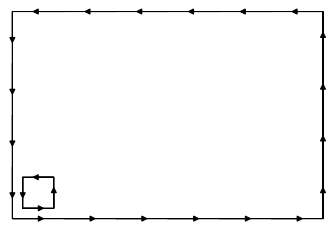

In [53]:
import matplotlib.pyplot as plt

def draw_U(x,mu):
    plt.arrow(x[0],x[1],mu[0],mu[1])
    plt.arrow(x[0],x[1],mu[0]*0.5,mu[1]*0.5, head_width=0.1, head_length=0.1, fc='k', ec='k')
    
def draw_P(x):
    a = 0.2; oma = 1.0 - a; l = 1.0 - 2*a;
    draw_U([x[0]+a,x[1]+a],[l,0.0])
    draw_U([x[0]+oma,x[1]+oma],[-l,0.0])
    draw_U([x[0]+oma,x[1]+a],[0.0,l])
    draw_U([x[0]+a,x[1]+oma],[0.0,-l])
    
fig, ax = plt.subplots()

plt.axis("off")
ax.set_aspect('equal')

nx = 6
ny = 4
plt.xlim(-0.1,nx + 0.1)
plt.ylim(-0.1,ny + 0.1)

for x in range(nx):
    draw_U([x,0],[1,0])
    draw_U([x+1,ny],[-1,0])
for y in range(ny):
    draw_U([0,y+1],[0,-1])
    draw_U([nx,y],[0,1])
    
draw_P([0,0])

plt.show()

In this case there are a lot of links that only appear once and therefore their integrals vanish.  In addition, however, there are some links that appear twice as in the integral
$$
\begin{align}
M^{(2)}_{ab,cd} = \int d[U_\mu(x)] (U_\mu(x))_{ab} (U_\mu(x))_{cd} \,.
\end{align}
$$
One can show that such integrals have to vanish.  We check this again numerically.

In [94]:
np.random.seed(13)
for a in range(3):
    for b in range(3):
        for c in range(3):
            for d in range(3):
                v, e = haar_integrate(lambda u: u[a,b]*u[c,d], U, 4000, 2)
                if abs(v) >= 3*e:
                    print(a,b,c,d, v, e)

We see that the configurations with minimal power of $\beta$ that can survive are those where each link in $W_C$ is matched by the inverse link of a given plaquette.  The corresponding configuration is plotted below.

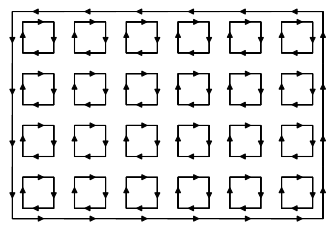

In [66]:
fig, ax = plt.subplots()

plt.axis("off")
ax.set_aspect('equal')

def draw_invP(x):
    a = 0.2; oma = 1.0 - a; l = 1.0 - 2*a;
    draw_U([x[0]+oma,x[1]+a],[-l,0.0])
    draw_U([x[0]+a,x[1]+oma],[l,0.0])
    draw_U([x[0]+oma,x[1]+oma],[0.0,-l])
    draw_U([x[0]+a,x[1]+a],[0.0,l])

nx = 6
ny = 4
plt.xlim(-0.1,nx + 0.1)
plt.ylim(-0.1,ny + 0.1)

for x in range(nx):
    draw_U([x,0],[1,0])
    draw_U([x+1,ny],[-1,0])
for y in range(ny):
    draw_U([0,y+1],[0,-1])
    draw_U([nx,y],[0,1])
    
for x in range(nx):
    for y in range(ny):
        draw_invP([x,y])

plt.show()

In this configuration, we only have to consider integrals of the type
$$
\begin{align}
N(X)_{ab} = \int d[U_\mu(x)] (U_\mu(x) X U_\mu(x)^\dagger)_{ab}
\end{align}
$$
for which we can show that for every group element $V$, we have
$$
\begin{align}
(V N(X))_{ab} = \int d[U_\mu(x)] (V U_\mu(x) X U_\mu(x)^\dagger)_{ab} = \int d[U_\mu(x)] (U_\mu(x) X U_\mu(x)^\dagger V)_{ab} = (N(X) V)_{ab} \,.
\end{align}
$$
We therefore have that $N(X)$ commutes with every group element $V$ and therefore by Schur's lemma
it must be proportional to the identity matrix, i.e.,
$$
\begin{align}
N(X)_{ab} = \int d[U_\mu(x)] (U_\mu(x) X U_\mu(x)^\dagger)_{ab} = n(X) \delta_{ab} \,.
\end{align}
$$
We also have that $N(X)$ must be linear in $X$ such that we must be able to write
$$
n(X) = n_{ab} X_{ba} \,.
$$
Since this needs to hold for arbitrary $X$, we now have the identity
$$
\begin{align}
\int d[U_\mu(x)] (U_\mu(x))_{ab} (U_\mu(x)^\dagger)_{cd} = n_{bc} \delta_{ad} \,.
\end{align}
$$
We now determine $n_{bc}$ by setting $a=d$ and summing over them such that we have
$$
\begin{align}
\delta_{bc} = n_{bc} N_c \,.
\end{align}
$$
We therefore finally arrive at the most important integration formula for this chapter
$$
\begin{align}
\int d[U_\mu(x)] (U_\mu(x))_{ab} (U_\mu(x)^\dagger)_{cd} = \frac1{N_c} \delta_{bc} \delta_{ad} \,.
\end{align}
$$
Let us first verify this numerically:

In [95]:
np.random.seed(13)
for a in range(3):
    for b in range(3):
        print(f"checking all a={a}, b={b}")
        for c in range(3):
            for d in range(3):
                v, e = haar_integrate(lambda u: u[a,b]*u.H[c,d], U, 2000, 2)
                err = abs(v - (1.0/3.0 if b == c and a == d else 0.0))
                assert err < 3*e

checking all a=0, b=0
checking all a=0, b=1
checking all a=0, b=2
checking all a=1, b=0
checking all a=1, b=1
checking all a=1, b=2
checking all a=2, b=0
checking all a=2, b=1
checking all a=2, b=2


The lowest-order $\beta$ contribution for a $n_s \times n_t$ Wilson loop is therefore given by
$$
\begin{align}
\langle W_C \rangle
&= 
\int d[U]  \textrm{Tr}\left[\prod_{\mu_i,x_i \in C} U_{\mu_i}(x_i)\right] 
\frac1{(n_s n_t)!} \left(\frac{\beta}{2N_c}\right)^{n_s n_t} (\sum_P \textrm{Tr}\: U_P)^{n_s n_t} ( 1 + O(\beta)) \,,
\end{align}
$$
We now need to count how many link pairs we have in this case.  We first note that we have
$(n_s n_t)!$ permutations of the individual plaquettes.  Let us now first integrate over the internal plaquette
pairs.  We can write such a pair as
$$
\int d[U_\mu(x)] \textrm{Tr}\: [A U_\mu(x)] \textrm{Tr}\: [B U_\mu(x)^\dagger] = \frac1{N_c} \textrm{Tr} \: [B A] \,. 
$$
Therefore for each removed link we get a factor of $\frac1{N_c}$ and obtain a joint loop with the integrated link removed.  This could look like:

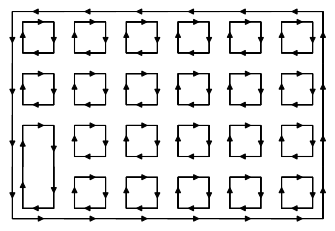

In [79]:
fig, ax = plt.subplots()

plt.axis("off")
ax.set_aspect('equal')

def draw_invP_2(x):
    a = 0.2; oma = 1.0 - a; l = 1.0 - 2*a; 
    tma = 2.0 - a; tl = 1.0 - a;
    draw_U([x[0]+oma,x[1]+a],[-l,0.0])
    draw_U([x[0]+a,x[1]+tma],[l,0.0])
    draw_U([x[0]+oma,x[1]+tma-tl],[0.0,-tl])
    draw_U([x[0]+oma,x[1]+tma],[0.0,-tl])
    draw_U([x[0]+a,x[1]+a],[0.0,tl])
    draw_U([x[0]+a,x[1]+tl+a],[0.0,tl])

nx = 6
ny = 4
plt.xlim(-0.1,nx + 0.1)
plt.ylim(-0.1,ny + 0.1)

for x in range(nx):
    draw_U([x,0],[1,0])
    draw_U([x+1,ny],[-1,0])
for y in range(ny):
    draw_U([0,y+1],[0,-1])
    draw_U([nx,y],[0,1])
    
for x in range(nx):
    for y in range(ny):
        if x != 0 or y >= 2:
            draw_invP([x,y])
draw_invP_2([0,0])

plt.show()

Combining the factorial and $1/N_c$ powers, we find
for the lowest-order $\beta$ contribution for a $n_s \times n_t$ Wilson loop
$$
\begin{align}
\langle W_C \rangle
&= 
\left(\frac{\beta}{2N_c^2}\right)^{n_s n_t} \textrm{Tr}\:[\mathbb{1}]( 1 + O(\beta)) \\
&= 
N_c\exp\left(n_s n_t\log\left(\frac{\beta}{2N_c^2}\right)\right)( 1 + O(\beta)) \,,
\end{align}
$$

If we now again identify the Wilson loop with the static quark potential $V(n_s)$, we find
$$
\begin{align}
\langle W_C \rangle \propto \exp(-n_t V(n_s))
\end{align}
$$
for sufficiently large $n_t$.  We can therefore at leading order in $\beta$
identify
$$
\begin{align}
V(n_s) = -n_s\log\left(\frac{\beta}{2N_c^2}\right) \,.
\end{align}
$$
We indeed find a linear growth of the potential in distance $n_s$.  The strong-beta expansion
converges quite poorly such that the numerical value of the resulting string tension is not
significant, however, we can read off
$$
\begin{align}
\sigma = -\log\left(\frac{\beta}{2N_c^2}\right)
\end{align}
$$
which for our coarsest simulation at $\beta=5.5$ corresponding to $a=0.25$ fm would yield
$$
\begin{align}
\sigma = -\log\left(\frac{\beta}{2N_c^2}\right) \approx 1.2 \times \frac{0.1973 \:\textrm{GeV}\:\textrm{fm}}{(0.25 \:\textrm{fm})^2} \approx 3.8 \frac{\textrm{GeV}}{\textrm{fm}}
\end{align}
$$
quite a bit larger than the approximate $1$ GeV / fm found numerically in the continuum limit of pure QCD in the last chapter.